In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd

In [2]:
def canon(A, x):
    """
    Evalua un polinomio en forma canonica
    A: terminos
    x: punto a evaluar
    """
    return np.sum([a*(x**c) for c, a in enumerate(A)])

def prod(B, x):
    """
    Evalua un polinomio en forma de producto
    B: terminos
    x: punto a evaluar
    """
    B2 = B.copy()
    sign = B2.pop(0)
    return np.float16(sign) * np.prod([(x+b) for b in B2])

def genPoly(N, d=10):
    """
    Genera los datos a usar para los coeficientes y raices, devuelve ambos
    N: rango de valores a usar, de -N/2 a N/2 de un grado d
    """
    raices = [np.float64(np.random.randint(N)) - N/2 for _ in range(d)]
    coef = np.flip(np.poly(-np.array(raices)))
    raices.insert(0, 1)
    return raices, coef
    

In [3]:
def evalPoly(A, B, iter=100):
    """
    Funcion que evaluar si dos polinomios son equivalentes
    A: coeficientes de forma canonica
    B: constantes de forma producto
    iter: numero de iteraciones a probar
    """
    deg = len(A) - 1
    N = 100 * deg
    for _ in range(iter):
        x = np.random.randint(N)
        c = canon(A, x)
        p = prod(B, x)
        if not np.isclose(c, p):
            #print(x)
            return False
    return True

In [4]:
# Generar un nuevo conjunto de N valores en ambas formas y probar en cuantos se equivoca
N = 100
D = [5, 10, 15, 20, 30]

T = np.zeros((len(D), N))

j = 0
for d in D:
    for i in range(N):
        t = time.time()
        raices, coef = genPoly(20, d)
        evalPoly(coef, raices)
        T[j, i] = time.time() - t
    j+=1
    
#print("Porcentaje de aciertos: ", tr/N)

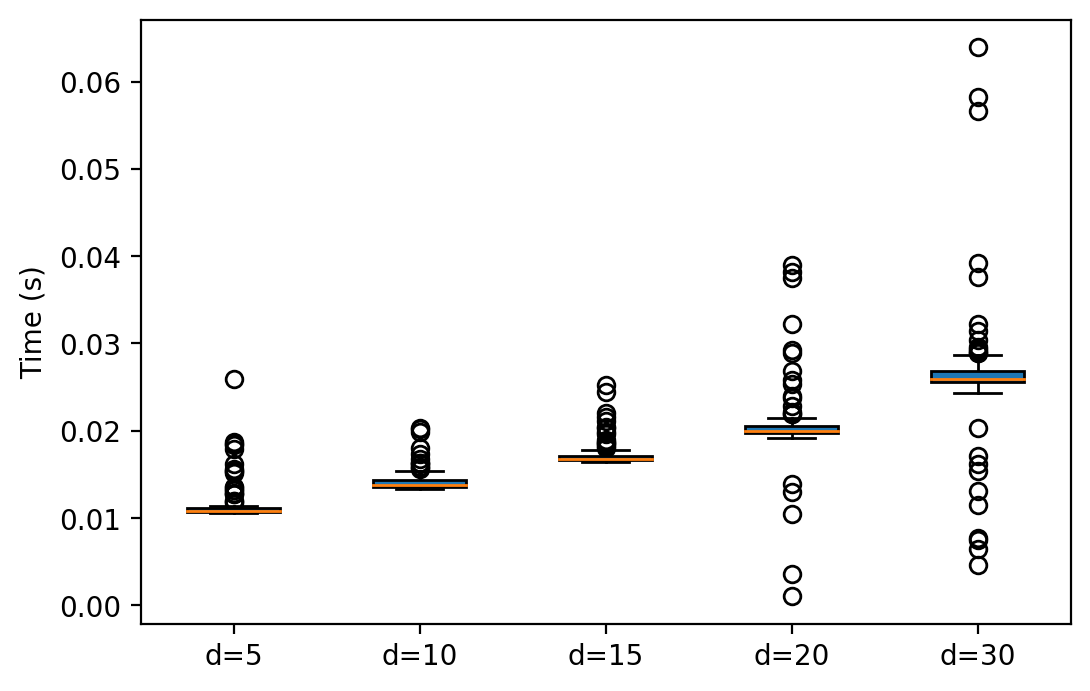

In [27]:
plt.figure(figsize=(6,4), dpi=200)
plt.boxplot(T.T,
            patch_artist=True,
            labels=["d=5","d=10","d=15","d=20","d=30"])
plt.ylabel("Time (s)")

plt.show()